In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [113]:
%matplotlib notebook

In [114]:
def odefunc(u_1, t, a):
    Nx = len(u_1)-1
    dudt = np.zeros(Nx+1)
    F = a[0]
    dx = a[1]
#     print('F', F)
#     print('dx',dx)
    # Compute u at inner mesh points
    for i in range(1, Nx):
        dudt[0]=(u_1[Nx] - 2*u_1[0] + u_1[1])*F/dx**2
        dudt[i] = (u_1[i-1] - 2*u_1[i] + u_1[i+1])*F/dx**2
        dudt[Nx]=(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])*F/dx**2
        #for i in range(0, Nx+1):
         #   u_1[i] = u_1[i] + dudt[i]

    return dudt


In [115]:
L = 1
dT = .1
Nx = 100
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
F = 0.0001
a = [F,dx] 
T = 10

In [116]:
# Initial condition
u_1 = np.zeros(Nx+1) 

50


<IPython.core.display.Javascript object>


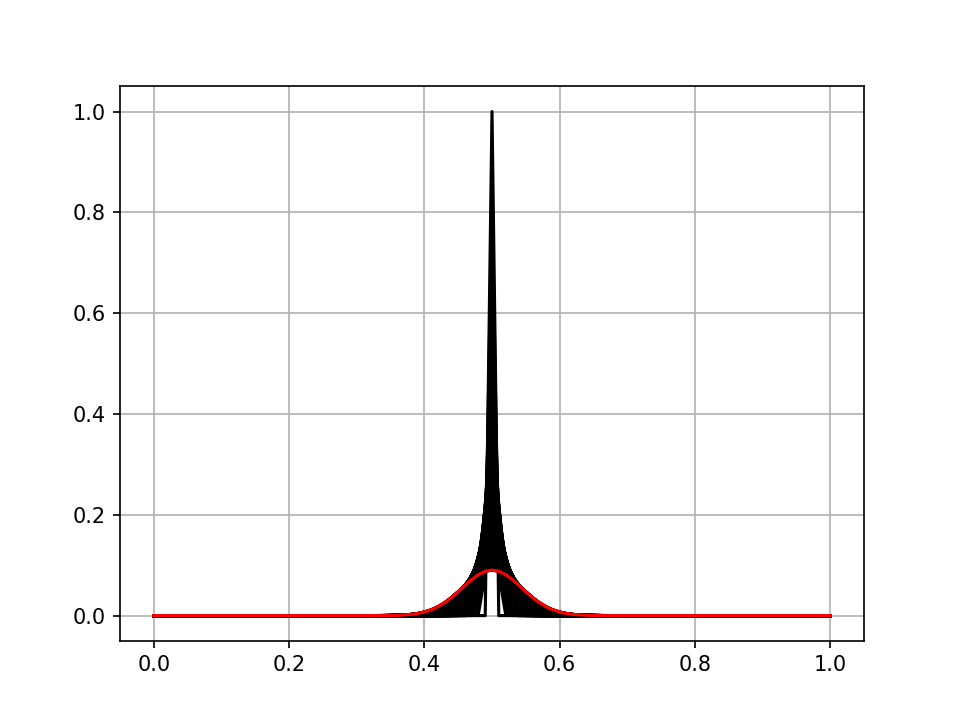

In [117]:
# Add a bump at xspike and integrate up to T
bump = 1
xspike = L/2

ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump
t = np.arange(0, T, dT)    # mesh points in time
sol1 = odeint(odefunc, u_1, t, args = (a,))
plt.figure()
plt.plot(x, sol1.T,'k')
u_1 = sol1[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

25


<IPython.core.display.Javascript object>


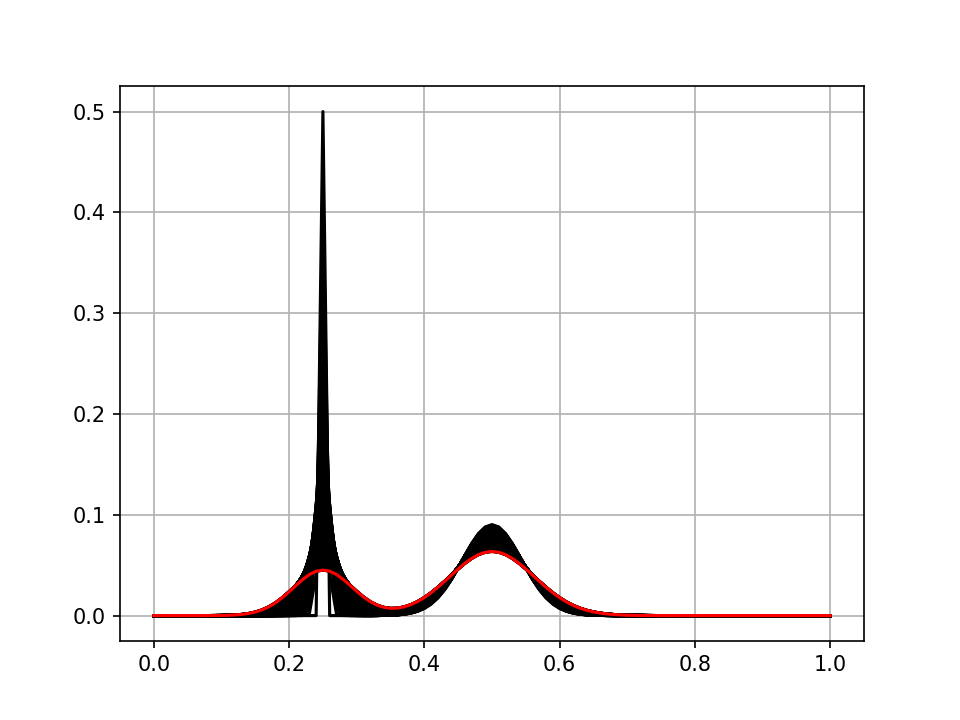

In [118]:
# Add a bump at xspike and integrate up to T
bump = .5
xspike = L/4

ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump
t = np.arange(0, T, dT)    # mesh points in time
sol2 = odeint(odefunc, u_1, t, args = (a,))
plt.figure()
plt.plot(x, sol2.T,'k')
u_1 = sol2[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

75


<IPython.core.display.Javascript object>


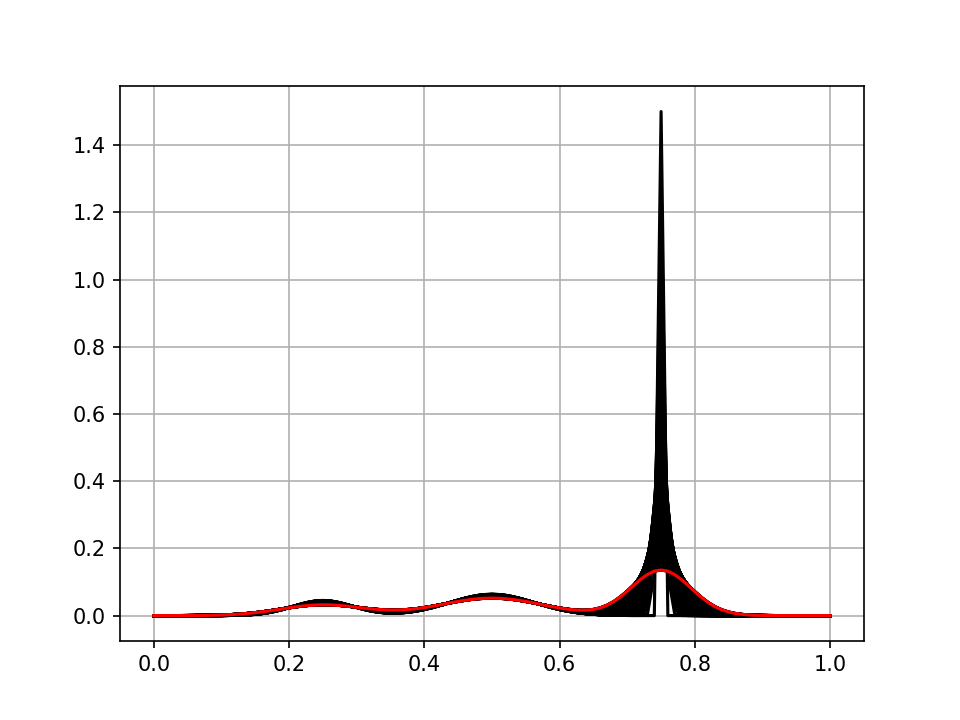

In [119]:
# Add a bump at xspike and integrate up to T
bump = 1.5
xspike = L*3/4

ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump
t = np.arange(0, T, dT)    # mesh points in time
sol3 = odeint(odefunc, u_1, t, args = (a,))
plt.figure()
plt.plot(x, sol3.T,'k')
u_1 = sol3[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

(100, 101)
300


<IPython.core.display.Javascript object>


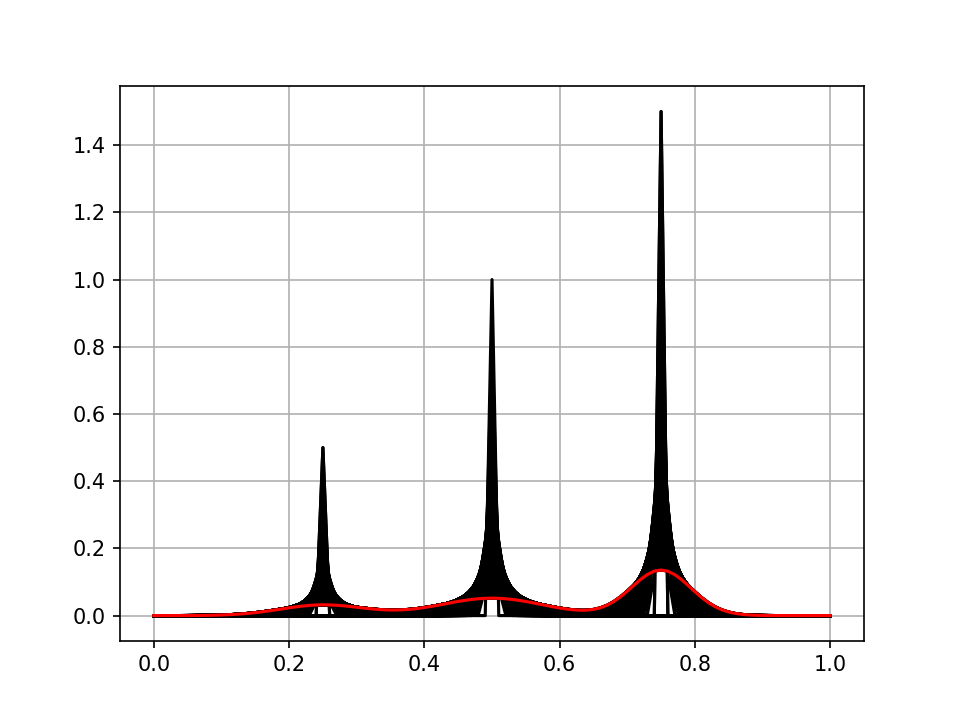

In [120]:
print(np.shape(sol1))
sol = np.vstack((sol1,sol2,sol3))
Ntimes,dummy = np.shape(sol); print(Ntimes)
plt.figure()
plt.plot(x, sol.T,'k')
u_1 = sol[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

In [121]:
print(np.shape(sol))
Ztot = np.diff(sol,axis=1)/dx
Z2tot = Ztot**2; print(np.shape(Z2tot))
Z2totSize = np.size(Z2tot)
Z2tot_long = np.reshape(Z2tot, Z2totSize)
print(np.shape(Z2tot_long))

(300, 101)
(300, 100)
(30000,)


17405
[855 258 159 120  79  73  62  60  47]
[0.00000000e+00 1.11111111e-05 2.22222222e-05 3.33333333e-05
 4.44444444e-05 5.55555556e-05 6.66666667e-05 7.77777778e-05
 8.88888889e-05 1.00000000e-04]
ratio =  18.19148936170213


<IPython.core.display.Javascript object>


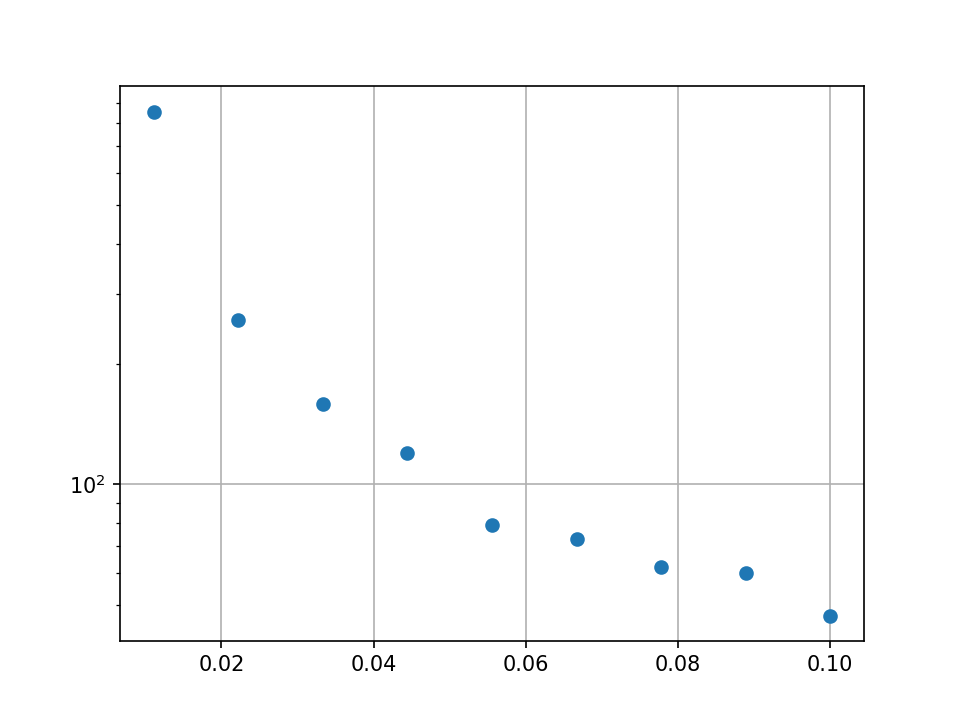

In [130]:
goodindicies = np.argwhere(Z2tot_long>.000001); print(len(goodindicies))
mybins = np.linspace(0,.0001,10)
counts, bins = np.histogram(Z2tot_long[goodindicies],mybins)
print(counts)
print(bins)
print('ratio = ', counts[0]/counts[-1])
plt.figure()
plt.semilogy(bins[1:]*1e3, counts, 'o')
plt.grid(True)